<a href="https://colab.research.google.com/github/iamatul1214/Tensorflow_Certification_Preparation/blob/main/Computer_vision_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook is for solving some computer vision problems using CNN and tensorflow. We will use the first problem and the dataset will be imported using zipfile 

In [25]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os
!pwd
ROOT = "/content/drive/MyDrive/Tensorflow certifications work"
os.chdir(ROOT)
!pwd

/content
/content/drive/MyDrive/Tensorflow certifications work


### Here we are using classification for Pizza and steak.

In [27]:
# import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

### Let's look into the directory structure downloaded

In [2]:
for dir_path, dir_name, file_name in os.walk("pizza_steak"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in directory : {dir_path} ")

There are 2 directories and 0 files in directory : pizza_steak 
There are 2 directories and 0 files in directory : pizza_steak/test 
There are 0 directories and 250 files in directory : pizza_steak/test/steak 
There are 0 directories and 250 files in directory : pizza_steak/test/pizza 
There are 2 directories and 0 files in directory : pizza_steak/train 
There are 0 directories and 750 files in directory : pizza_steak/train/steak 
There are 0 directories and 750 files in directory : pizza_steak/train/pizza 


### Let's visualize our dataset now

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+target_class

  ## Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  ## reading the image using matplotlib
  img = mpimage.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") ## show the shape of image

  return img



['493029.jpg']
Image shape: (384, 512, 3)


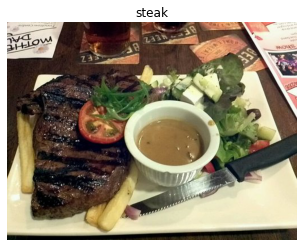

In [4]:
## viewing random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [5]:
import tensorflow as tf
tf.constant(img) ## this is the mathematical representation of our image

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[149, 132, 122],
        [176, 159, 149],
        [198, 181, 171],
        ...,
        [229, 229, 217],
        [251, 251, 239],
        [241, 241, 229]],

       [[202, 185, 175],
        [227, 210, 200],
        [237, 220, 210],
        ...,
        [248, 248, 236],
        [252, 252, 240],
        [249, 249, 237]],

       [[195, 178, 168],
        [225, 208, 198],
        [239, 222, 212],
        ...,
        [255, 255, 244],
        [244, 242, 230],
        [240, 238, 226]],

       ...,

       [[ 11,  20,  15],
        [  5,  14,   9],
        [  1,  10,   5],
        ...,
        [ 64,  51,  35],
        [ 65,  52,  36],
        [ 59,  46,  30]],

       [[  0,  11,   3],
        [  4,  15,   7],
        [  6,  17,   9],
        ...,
        [ 55,  42,  26],
        [ 59,  46,  30],
        [ 57,  44,  28]],

       [[  0,   4,   0],
        [  4,  15,   7],
        [ 14,  25,  17],
        ...,
        [ 54,  41,  2

### Many machine learning algorithms including NN prefer to get data between 0 and 1. Knowing this one of the most common techniques to do so with images is to divide the image shape by 255 as 255 is the maximum pixel value.

In [32]:
img/255.0

array([[[0.49019608, 0.42352941, 0.34509804],
        [0.34901961, 0.28235294, 0.21176471],
        [0.30196078, 0.23529412, 0.17254902],
        ...,
        [0.2745098 , 0.24313725, 0.2       ],
        [0.24705882, 0.21568627, 0.17254902],
        [0.23137255, 0.20784314, 0.16078431]],

       [[0.5372549 , 0.46666667, 0.38823529],
        [0.39215686, 0.31764706, 0.25098039],
        [0.32156863, 0.24705882, 0.18823529],
        ...,
        [0.25490196, 0.22352941, 0.18039216],
        [0.24313725, 0.21176471, 0.16862745],
        [0.23137255, 0.20392157, 0.16470588]],

       [[0.60784314, 0.5372549 , 0.45882353],
        [0.4627451 , 0.38823529, 0.32156863],
        [0.36078431, 0.28627451, 0.22745098],
        ...,
        [0.23921569, 0.2       , 0.16078431],
        [0.23137255, 0.19607843, 0.16078431],
        [0.22352941, 0.18823529, 0.15294118]],

       ...,

       [[0.78431373, 0.63529412, 0.24705882],
        [0.79215686, 0.64313725, 0.2627451 ],
        [0.80784314, 0

## An end to end example

### Here we will build an CNN model with following steps
**Load our images**

**Preprocess our images**


**Compile our CNN**

**Fit the CNN to training data**

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## setting the seed
tf.random.set_seed(42)

## preprocess the data ( get all the pixel values between 0 and 1 also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)   ## this is real time data augmentation
valid_datagen = ImageDataGenerator(rescale = 1./255)

## setup paths to our data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

## import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                               batch_size = 32, 
                                               shuffle=True,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

## Build a CNN model same as Tiny VGG on the CNN explainer website

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

## compile our cnn model

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

## fit the model
history_1 = model_1.fit(train_data, epochs = 5,steps_per_epoch = len(train_data),validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 253ms/step - loss: 0.5639 - accuracy: 0.7127 - val_loss: 0.4988 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 0.4128 - accuracy: 0.8133 - val_loss: 0.3277 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3916 - accuracy: 0.8200 - val_loss: 0.3346 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3947 - accuracy: 0.8227 - val_loss: 0.3310 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 11s 243ms/step - loss: 0.3223 - accuracy: 0.8593 - val_loss: 0.3095 - val_accuracy: 0.8640


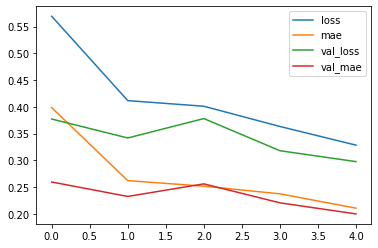

In [34]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

### Let's create a non CNN model and try to run with our image dataset

In [42]:
## Set random seed
tf.random.set_seed(42)

## creating model to replicate the tensorflow pklayground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

## compiling the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

## fit the model

history_2 = model_2.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 269ms/step - loss: 1.1595 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


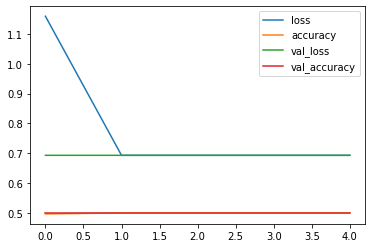

In [44]:
import pandas as pd
pd.DataFrame(history_2.history).plot()

### Let's try to modify our model_2 which is a non cnn model and check if we can get better accuracy with better non cnn architecture or not.

In [37]:
## Now let's check the summar of both of our models first
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [38]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 4)                 602116    
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [39]:
## creating model 3 with one more layer and more number of neurons

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 262ms/step - loss: 4.7211 - accuracy: 0.6233 - val_loss: 0.7659 - val_accuracy: 0.6580
Epoch 2/5
47/47 [==============================] - 15s 325ms/step - loss: 0.7570 - accuracy: 0.7160 - val_loss: 0.6341 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6485 - accuracy: 0.7300 - val_loss: 1.0898 - val_accuracy: 0.6580
Epoch 4/5
47/47 [==============================] - 15s 309ms/step - loss: 0.6053 - accuracy: 0.7480 - val_loss: 0.4373 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 14s 301ms/step - loss: 0.5078 - accuracy: 0.7727 - val_loss: 0.5885 - val_accuracy: 0.7360


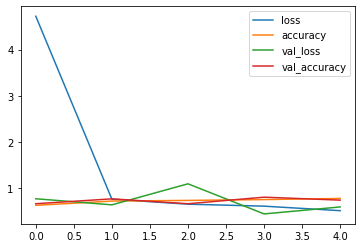

In [41]:
pd.DataFrame(history_3.history).plot()

In [40]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### We can see that the accuracy of the model_3 is better than the model_2 which means we can increase the accuracy by using just NN and not CNN, but if we look at the learning parameteres they are quite a lot for the model_3 and model_2 but for CNN we have less parameters and still better accuracy than other two.

## Let's break down the binary classification what we performed above.

1. Become one with data (visualize,visualize,visualize)
2. Preprocess the data ( prepare it for our model, main step is scaling/normalizing
3. Create a model ( start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different paramters and improve the model
7. Repeat until satisfied ( experiment, experiment, experiment)

['2395127.jpg']
Image shape: (384, 512, 3)
['3102271.jpg']
Image shape: (512, 512, 3)


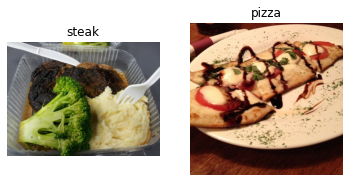

In [18]:
## visualizing

plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/","pizza")

### preprocess the data and prepare it for model but let's augment the data this time.

In [8]:
## define directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
## Import data from directory and augment it
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size = (224,224),batch_size = 32,class_mode = "binary", shuffle = False)
## creating non augmented training data
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size = 32,class_mode = "binary", shuffle = False)
## creating non augmented testing data
test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224), batch_size = 32, class_mode = "binary", shuffle = True)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Showing image number 1


(-0.5, 223.5, 223.5, -0.5)

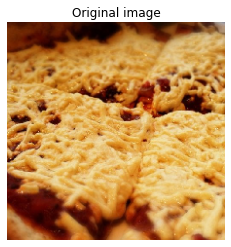

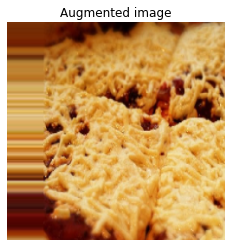

In [23]:
## Show original image and augmented image
import random
random_number = random.randint(0,32)   ## since our batch size is 32
print(f"Showing image number {random_number}")
plt.imshow(images[random_number])
# plt.imshow(images[5])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
# plt.imshow(augmented_images[5])
plt.title(f"Augmented image")
plt.axis(False)